# Recall

In [3]:
s = 'agctaggaggatcgccagat'

def get_kmers(s, k):
    """ This function return the set of k-mers that occur in a given string """
    kmers = set()
    for i in range(len(s) - k +1):
        kmers.add(s[i:i+k])
    return kmers

def get_positions(s,w):
    positions = list()
    for i in range(len(s)):
        if s[i:i+len(w)] == w:
            positions.append(i)
    return positions

def count_occurrences(s,w):
    """
        Count the number of occurences of w in s
        --------
        Parameters:
            s (str)
            w (str)
    """
    count = 0
    for i in range(len(s) -len(w) +1):
        for j in range(len(w)):
            if s[i+j] != w[j]:
                break
        else:
            count += 1
    return count


def k_entropy(s,k):
    """
        Calculate the empirical k-entropy on k-mers in s
    """
    t = 0.0
    for kmer in get_kmers(s,k):
        t += count_occurrences(s,kmer)
    
    e = 0.0
    for kmer in get_kmers(s,k):
        e += math.log(count_occurrences(s,kmer) / t, 2)
    return -e


---
# Genomic distributions

## Word multiplicity distribution

The word multiplicity distribution (WMD) is a function that assigns to words their corresponding multiplicity in a given string. <br>
For example, one may wnat to assign to each symbol of the alphabet the number of its occurrences within a string.

In [4]:
nuc_alphabet = ['a','c','g','t']
for n in nuc_alphabet:
    print(n, s.count(n))

a 6
c 4
g 7
t 3


Generally, a specific word length  $k$ is chosen, and the distribution is retrieved for the set of  $k$-mers.The complete set of  $k$-mers, even if they not occur in the string, can be used as domain of the distribution, or only those occurring in the string can be taken into account.

In [5]:
kmers = get_kmers(s, k = 2)
for kmer in kmers:
    print(kmer, count_occurrences(s,kmer))

gc 2
tc 1
ca 1
ta 1
ag 4
at 2
cc 1
cg 1
ct 1
gg 2
ga 3


---
### Python key-value collections (dictionaries)
Distributions are injective functions that assign values to a set of domain objects. In python, a data structure which maps values to keys in an injective way is called dictionary. Such data structure is a modifiable collection of pairs in the form $(key,value)$. 
<br>
Dictionaries can be declared statically by specifying an initial set of pairs, or can be declared without an explicit initial collection.
<br>
The single-slice operator allows to access the value associated with a specific key, as well as the updated of the value.

In [6]:
D = {1:'one', 2:'two'} 

print(D[1])
print(D[2])

D[3] = 'three'

print(D[3])

one
two
three


<br>
There is not restriction on the type of keys and values.

In [7]:
D['four'] = 4

print(D['four'])

4


<br>
The built-in functions `items`, `keys` and `values` are used to iterate the collection.

In [8]:
for p in D.items():
    print(p)

(1, 'one')
(2, 'two')
(3, 'three')
('four', 4)


In [9]:
for k in D.keys():
    print(k,'-', D[k])

1 - one
2 - two
3 - three
four - 4


In [10]:
for k,v in D.items():
    print(k,'-',v)

1 - one
2 - two
3 - three
four - 4


---
### WMD as key-value collection
The development of the word multiplicity distribution result into a python dictionary which assigns multiplicity values (integers) to a set of key k-mers (strings).

In [11]:
WMD = dict() # multiplicity distribution 
kmers = get_kmers(s,2)
for kmer in kmers:
    WMD[kmer]  = count_occurrences(s,kmer)

for kmer in WMD.keys():
    print(kmer,  WMD[kmer])

cc 1
gc 2
cg 1
tc 1
ca 1
ta 1
ag 4
ga 3
gg 2
at 2
ct 1


Technically speaking, there is no assumption to the order in which keys, or pairs, are iterate because it depends on the internal data structure used by the specific python version to implement the dictionary. Thus, in case the user wants to output the distribution by the lexicographical order of the k-mers, an explicit sorting must be performed.

In [12]:
for kmer in sorted(WMD.keys()):
    print(kmer, WMD[kmer])

ag 4
at 2
ca 1
cc 1
cg 1
ct 1
ga 3
gc 2
gg 2
ta 1
tc 1


In [13]:
for kmer,mult in sorted(WMD.items()):
    print(kmer, mult)

ag 4
at 2
ca 1
cc 1
cg 1
ct 1
ga 3
gc 2
gg 2
ta 1
tc 1


---
Retrieving the set of k-mers and then searching for their multiplicity results in a redundant combination of steps, that can be merged together. The distribution can be built while scanning for k-mers in the string and, at the same time, by updating their multiplicity values.

In [14]:
WMD = dict() 
k = 2
for i in range(len(s) -k +1):
        w = s[i:i+k]  # extraction of the k-mer at position i
        WMD[w] += 1  # update of the occurrence of the k-mer w

KeyError: 'ag'

The single-slice operator of `dict` can only be used to access pairs that have been previously inserted in the collection. Thus, using it to access a key not yet present will cause an error.
<br>
A possible way to solve the problem is to firstly check for the presence of the key, and in case of absence making a first insertion of it. The operator `in` allows to check for the existence of a key in a dictionary.

In [15]:
WMD = dict() 
k = 2
for i in range(len(s) -k +1):
        w = s[i:i+k]
        if w in WMD: 
            WMD[w] += 1
        else:
            WMD[w] = 1

for kmer in WMD.keys():
    print(kmer,  WMD[kmer])

cc 1
gc 2
cg 1
ct 1
tc 1
ta 1
ag 4
gg 2
ga 3
ca 1
at 2


Alternatively, the built-in `get` function can be used. It allows to specify a default value that is returned in case of a missing key, without causing any error.
<br>
In the example, the default value of zero is used such that if $w$ has not yet inserted as a key, the `get` operation returns $0$ and the final counter is set to $1$. Conversely, if $w$ already exists within the collection, the operation return it current counter that will be updated by one.

In [16]:
WMD = dict() 
k = 2
for i in range(len(s) -k +1):
        w = s[i:i+k]
        WMD[w] = WMD.get(w, 0) + 1

for kmer in WMD.keys():
    print(kmer,  WMD[kmer])

cc 1
gc 2
cg 1
ct 1
tc 1
ta 1
ag 4
gg 2
ga 3
ca 1
at 2


Once a working code has been written, it can be also encapsulated in a function.

In [17]:
def get_multiplicity_distribution(s,k):
    """
        Return the word multiplciity distribution of k-mers occurrig in the string s
         ------
        Parameters:
            s (str) : the input string
            k (int) : the length of the k-mers 
        -------
        Returns:
            dict[str,int] : a dictionary which associates multiplicity values to the k-mers in s
    """
    WMD = dict()
    for i in range(len(s) -k +1):
        w = s[i:i+k]
        WMD[w] = WMD.get(w,0) + 1
    return WMD
        
WMD = get_multiplicity_distribution(s,2)

for k,v in sorted(WMD.items()):
    print(k,v)

ag 4
at 2
ca 1
cc 1
cg 1
ct 1
ga 3
gc 2
gg 2
ta 1
tc 1


<br>
The given WMD implementation speed the calculation of the informational indexes up.

In [18]:
ifile = 'mycoplasma_genitalium_G37.fna'
mg37 = ''
for line in open(ifile, 'r'):
    if line.strip()[0] != '>':
        mg37 += line.strip()


def k_entropy(s,k):
    """
        Calculate the empirical k-entrpy on k-mers in s
    """
    t = 0.0
    for kmer in get_kmers(s,k):
        t += count_occurrences(s,kmer)
    
    e = 0.0
    for kmer in get_kmers(s,k):
        e += math.log(count_occurrences(s,kmer) / t, 2)
    return -e

        
import math

def fast_k_entropy(s,k):
    distr = get_multiplicity_distribution(s,k)
    t = sum(distr.values())
    e = 0.0
    for v in distr.values():
        e += math.log(v / t, 2)
    return -e
    
k = 2

import time

start_time = time.time()
print(str(k)+'-entropy', k_entropy(mg37,k))
print('seconds:', time.time() - start_time)

print()

start_time = time.time()
print(str(k)+'-entropy', fast_k_entropy(mg37,k))
print('seconds:', time.time() - start_time)

2-entropy 68.14659510137011
seconds: 9.609326839447021

2-entropy 68.14659510137011
seconds: 0.2609133720397949


---
## Word length distribution
The word length distribution (WLD) assigns to each word lenght $k$ the number of $k$-mers of $G$, namely the size of $D_k(G)$.

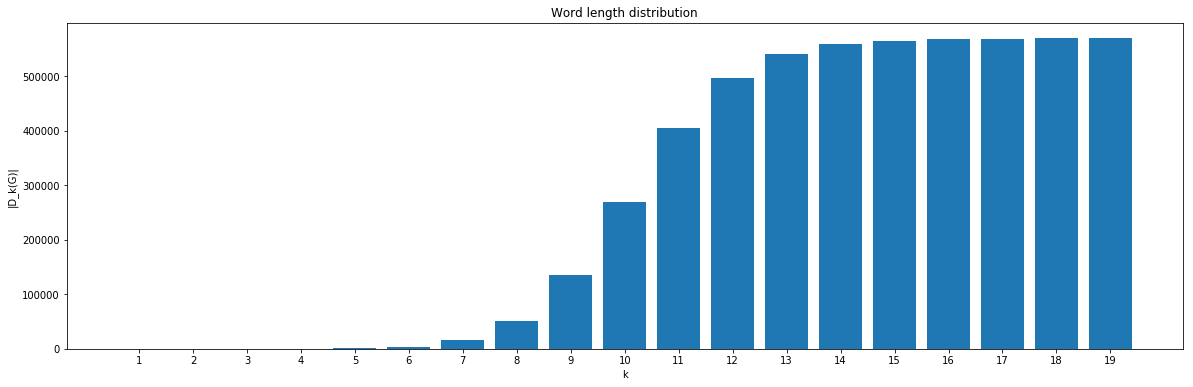

In [20]:
def wld(s, k_start, k_end):
    wld = dict()
    for k in range(k_start,k_end):
        wld[k] = len(get_kmers(s,k))
    return wld

k_start = 1
k_end = 20
wld = wld(mg37, k_start, k_end)

import matplotlib.pyplot as plt
bar_values = [v for k,v in sorted(wld.items())]
plt.rcParams['figure.figsize'] = [20, 6]
plt.bar(range(k_start,k_end), bar_values)
plt.xticks(range(k_start,k_end), range(k_start,k_end))
plt.ylabel('|D_k(G)|')
plt.xlabel('k')
plt.title('Word length distribution')
plt.show()

---
## Average multiplcity distribution
The average multiplcity distribution (AMD) assigns to each word lenght $k$ the average multiplcity of the k-mers of $G$.

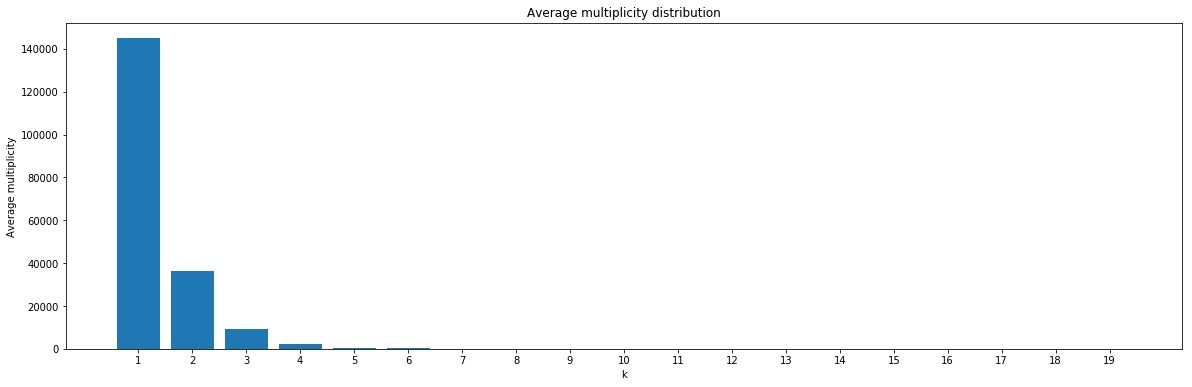

In [19]:
import statistics 

def amd(s, k_start, k_end):
    amd = dict()
    for k in range(k_start,k_end):
        amd[k] = statistics.mean( get_multiplicity_distribution(s,k).values() )
    return amd

k_start = 1
k_end = 20
amd = amd(mg37, k_start, k_end)

#for k,v in amd.items():
#    amd[k] = math.log(v)

#k_start = 12

import matplotlib.pyplot as plt
bar_values = [v for k,v in sorted(amd.items())]
plt.rcParams['figure.figsize'] = [20, 6]
plt.bar(range(k_start,k_end), bar_values)
plt.xticks(range(k_start,k_end), range(k_start,k_end))
plt.ylabel('Average multiplicity')
plt.xlabel('k')
plt.title('Average multiplicity distribution')
plt.show()

---
## Empirical entropy distribution
The empirical entropy distribution (EED) assigns to each word length $k$ the value of the k-entropy.

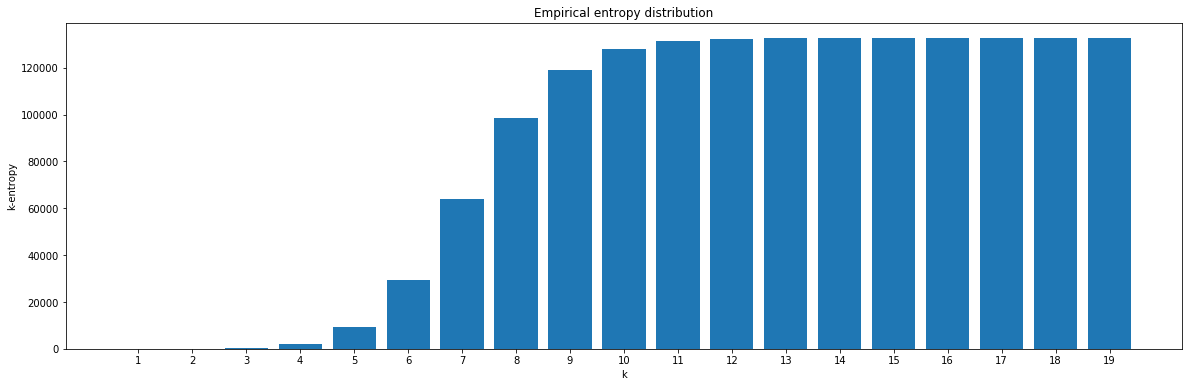

In [21]:
def eed(s, k_start, k_end):
    eed = dict()
    for k in range(k_start,k_end):
        eed[k] = fast_k_entropy(s,k)
    return eed

k_start = 1
k_end = 20
eed = eed(mg37[:10000], k_start, k_end)

#for k,v in amd.items():
#    amd[k] = math.log(v)

#k_start = 12

import matplotlib.pyplot as plt
bar_values = [v for k,v in sorted(eed.items())]
plt.rcParams['figure.figsize'] = [20, 6]
plt.bar(range(k_start,k_end), bar_values)
plt.xticks(range(k_start,k_end), range(k_start,k_end))
plt.ylabel('k-entropy')
plt.xlabel('k')
plt.title('Empirical entropy distribution')
plt.show()

---
##  Word co-multiplicity distribution
Given a value of $k$, the word multiplicity distribution (WMD) reports for each value of multiplicity the number of word having such multiplicity

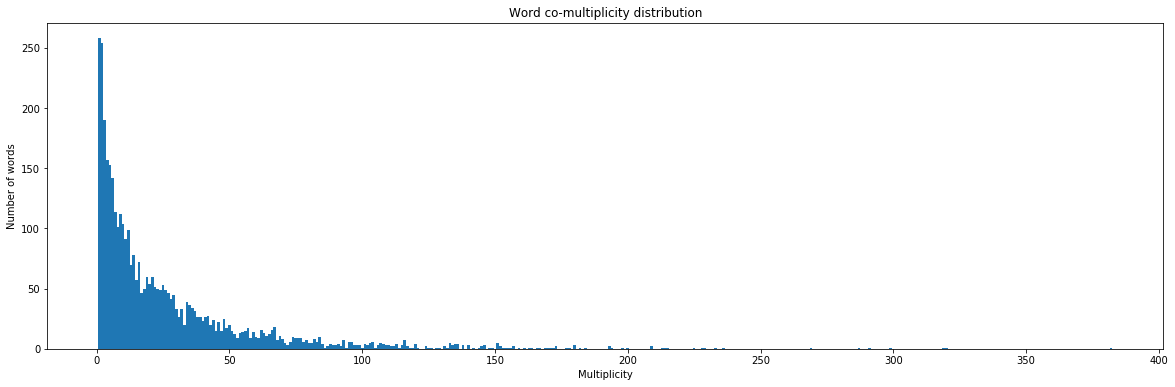

In [24]:
def wcmd(s,k):
    distr = dict()
    mdistr = get_multiplicity_distribution(s,k)
    for m in mdistr.values():
        distr[m]= distr.get(m,0) + 1
    return distr

k = 6
wcmd = wcmd(mg37[:100000],k)
# add missing multiplicity values
for i in range(1,max(wcmd.keys())):
    wcmd[i] = wmd.get(i,0) + 0

import matplotlib.pyplot as plt
bar_values = [v for k,v in sorted(wcmd.items())]
plt.rcParams['figure.figsize'] = [20, 6]
plt.bar(sorted(wmd.keys()), bar_values, width=1.0)
plt.ylabel('Number of words')
plt.xlabel('Multiplicity')
plt.title('Word co-multiplicity distribution')
plt.show()

---
# Recurrence patterns
Given a word $w$, the recurrence distance distribution (RDD) informs about the distances at which $w$ recurrs in a reference string $s$.
A recurrence distance is the distance between two consecutive occurrences of $w$. The RDD distribution reports how many times two consecutive occurrences recurr at a given distance. 

In [32]:
def RDD(s,w):
    """
        Extract the recurrence distance ditribution (RDD) of the word w in s.
        Given the starting postions of two occurences of w, p1 and p2, the reucrrence distance is calculated as
        p1 - p2
        such that consecutive occurrences are at distance 1.
        ----
        Parameters:
            s (str) : the reference string
            w (str) : the searched substring
        ----
        Returns:
            dict[int,int] : a dictionary mapping recurrence distances to the number of times they occur
    """
    pos = sorted(get_positions(s,w))
    rdd = dict()
    for i in range(2,len(pos)):
        l = pos[i] - pos[i-1] 
        rdd[l] = rdd.get(l,0) + 1
    return rdd

print(s+'\n')
print('RDD(a):', RDD(s,'a'))
print('RDD(t):',RDD(s,'t'))
print('RDD(c):',RDD(s,'c'))
print('RDD(g):',RDD(s,'g'))

agctaggaggatcgccagat

RDD(a): {2: 1, 3: 2, 6: 1}
RDD(t): {8: 1}
RDD(c): {1: 1, 2: 1}
RDD(g): {1: 2, 2: 1, 4: 2}


<br>
<br>
In real sequences, RDD distributions are usually defined on several values of recurrence distance. Thus, a simple printing results in a too much verbose output. The module `matlibplot` provide several functionalities for plotting charts in python. In this case, a bar plot is used to visualize the content of a RDD distribution.
<br>
If a recurrence distance between the minimum and the maximum retrieved values is missing, it is preferable to add such information by adding to the RDD a value equal to zero for the corresponding distances. In this way, the plot is more readable since the values on the x-axis are contiguous and no hidden gaps are produced.

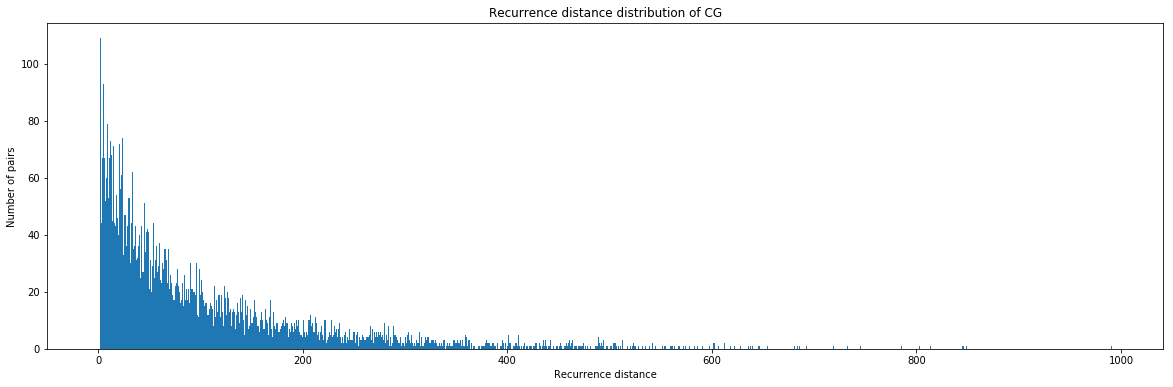

In [33]:
w = 'CG'
rdd = RDD(mg37,w)

def plot_RDD(rdd, title):
    # se a value equal to zero for the missing recurrence distances
    for d in range(0,max(rdd.keys())):
        rdd[d] = rdd.get(d,0) + 0
        
    # module can be imported by uring aliases to refer them
    import matplotlib.pyplot as plt 
    
    # set the figure size
    plt.rcParams['figure.figsize'] = [20, 6]
    # assign height of bars
    bar_values = [v for k,v in sorted(rdd.items())]
    # plot with specific values on the x-axis that are associated to the height
    plt.bar(sorted(rdd.keys()), bar_values, width=1.0)
    # set the label on the y-axis
    plt.ylabel('Number of pairs') 
    # set the label on the x-axis
    plt.xlabel('Recurrence distance')
    # set a title for the chart
    plt.title(title)
    # plot the chart
    plt.show()
    
plot_RDD(rdd, 'Recurrence distance distribution of '+ w)

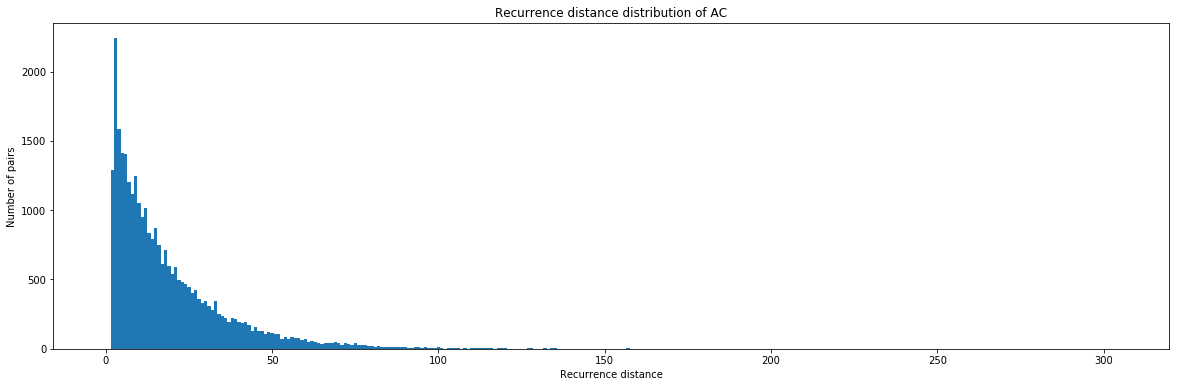

In [34]:
rdd = RDD(mg37,'AC')
plot_RDD(rdd, 'Recurrence distance distribution of AC')

---
## Average recurrence distance distribution

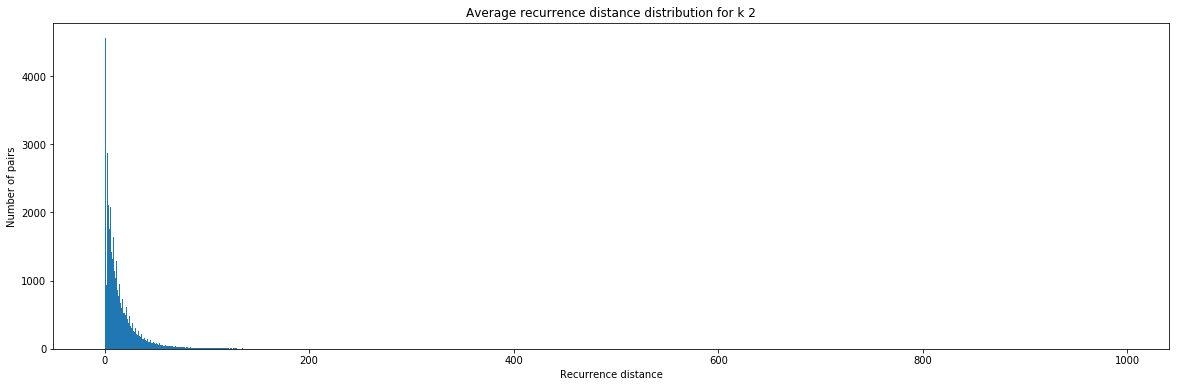

In [36]:
def aRDD(s,k):
    ardd = dict()
    kmers = get_kmers(s,k)
    for kmer in kmers:
        rdd = RDD(s,kmer)
        for distance,value in rdd.items():
            ardd[distance] = ardd.get(distance,0) + value
    for d,v in ardd.items():
        ardd[d] = ardd[d] / len(kmers)
    return ardd

k = 2
ardd = aRDD(mg37,k)

plot_RDD(ardd, 'Average recurrence distance distribution for k '+ str(k))

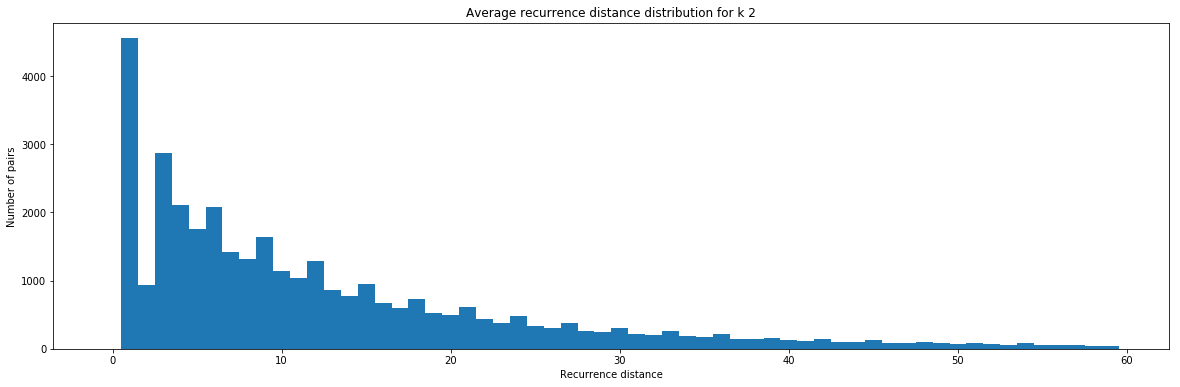

In [38]:
nardd = dict()
for d,v in ardd.items():
    if d <  60:
        nardd[d] = v
ardd = nardd

plot_RDD(ardd, 'Average recurrence distance distribution for k '+ str(k))

---
## Reading GFF3 files

In [71]:
ifile = 'mycoplasma_genitalium_G37.fna'
mg37 = ''
for line in open(ifile, 'r'):
    if line.strip()[0] != '>':
        mg37 += line.strip()

coverage = [0 for i in range(len(mg37))]
        
ifile = 'mycoplasma_genitalium_G37.gff3'
for line in open(ifile, 'r'):
    if line[0] != "#":
        cc = line.split('\t')
        if len(cc) >= 6:
            if (cc[2] == 'gene'):# and (cc[6] == '+'):
                start = int(cc[3])
                end = int(cc[4])
                for i in range(start, end):
                    coverage[i] += 1

print('sequence coverage',   (len(coverage) - coverage.count(0)) / len(coverage))

ncseq = ''.join([ mg37[i] for i in range(len(mg37)) if coverage[i] == 0 ])

cseq = ''.join([ mg37[i] for i in range(len(mg37)) if coverage[i] > 0 ])

print(len(mg37),len(ncseq), len(cseq))

sequence coverage 0.9502547941993807
580076 28856 551220


---
## Differences between coding and non-coding parts

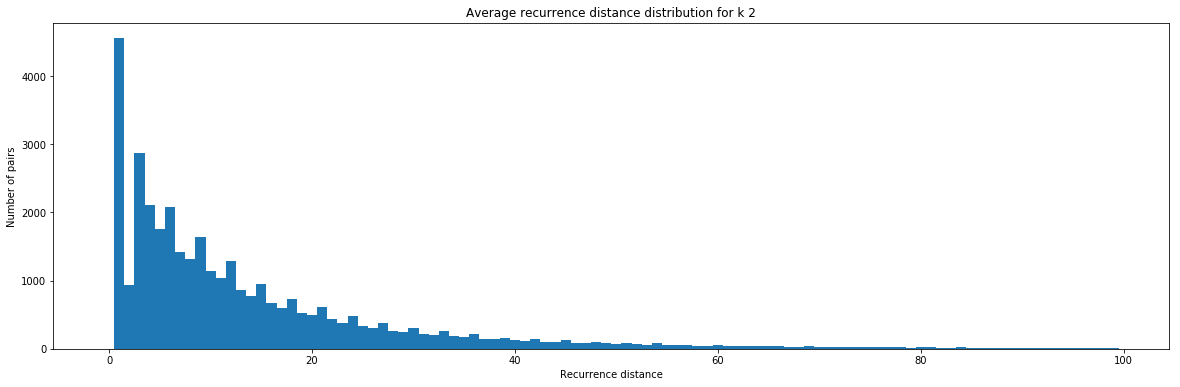

In [89]:
k = 2
ardd = aRDD(mg37,k)

nardd = dict()
for d,v in ardd.items():
    if d <  100:
        nardd[d] = v
ardd = nardd

plot_RDD(ardd, 'Average recurrence distance distribution for k '+ str(k))

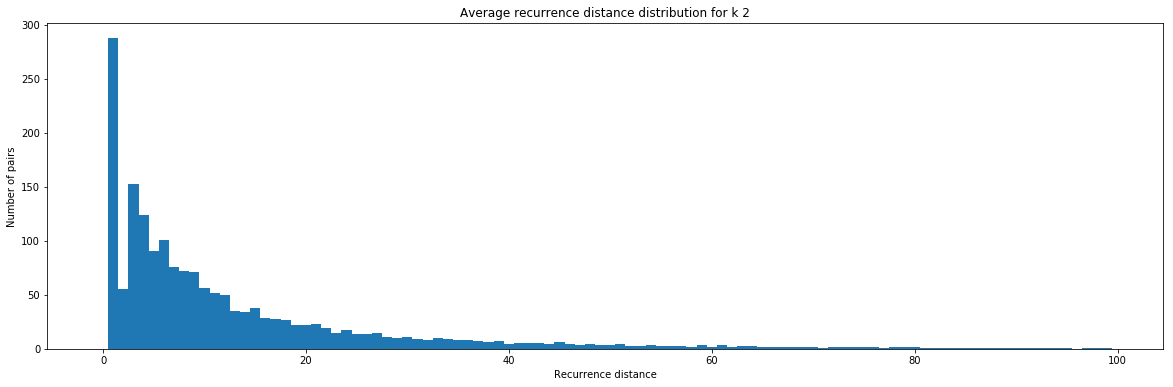

In [90]:
k = 2
ardd = aRDD(ncseq,k)

nardd = dict()
for d,v in ardd.items():
    if d < 100:
        nardd[d] = v
ardd = nardd

plot_RDD(ardd, 'Average recurrence distance distribution for k '+ str(k))

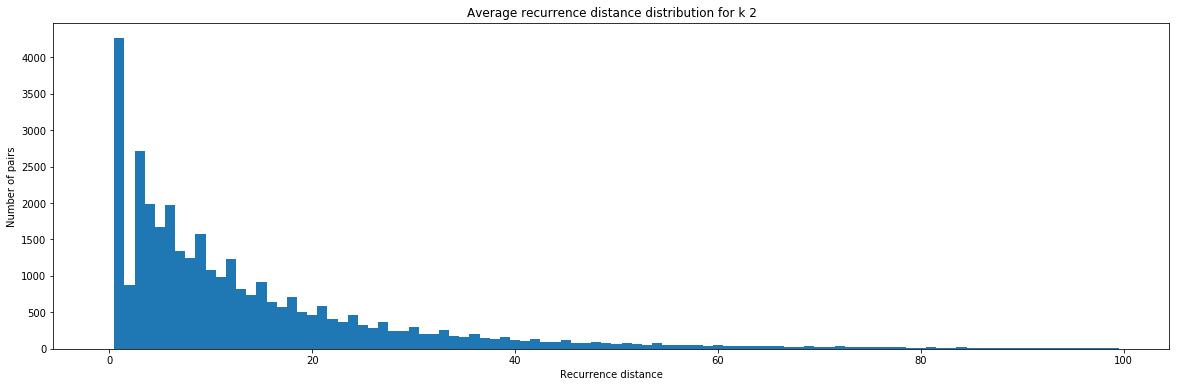

In [91]:
k = 2
ardd = aRDD(cseq,k)

nardd = dict()
for d,v in ardd.items():
    if d < 100:
        nardd[d] = v
ardd = nardd

plot_RDD(ardd, 'Average recurrence distance distribution for k '+ str(k))